In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [4]:
import matplotlib.pyplot as plt

In [5]:
batch_size = 128 # 収束されたかったら小さい値にする
num_class = 10
epochs = 20 #　過学習の場合は　減らす

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [13]:
len(x_train)

60000

In [14]:
keras.backend.image_data_format()

'channels_last'

In [15]:
print(type(x_train))

<class 'numpy.ndarray'>


In [16]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) #①
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

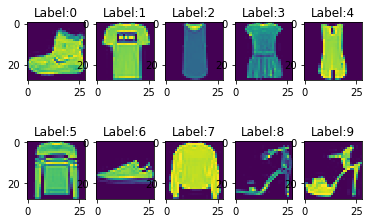

In [17]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("Label:" + str(i))
    plt.imshow(x_train[i].reshape(28,28), cmap= None) #cmap= None はカラーマップの指定をしない

In [18]:
x_train, x_test = x_train / 255.0, x_test / 255.0 #各要素の最大値が255までなので２５５で割って範囲を０～１にしている

In [21]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), # 3×３のデータが32枚ある
                       activation='relu',
                       input_shape=(28, 28, 1)), #①より28×２８×１を与えてやる
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), #2×２の一コマに変換
    keras.layers.Dropout(0.25), #25%のデータを捨てている
    #ココから全結合層を作る
    keras.layers.Flatten(), #先ずは水平に並べる
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_class, activation='softmax')
])

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy を　sparse_categorical_crossentropyに変更すると精度が向上した。
#それでも精度が向上しなかったら、optimizerを変更する

In [23]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 157s 3ms/step - loss: 0.4836 - acc: 0.8285
Epoch 2/10
60000/60000 [==============================] - 157s 3ms/step - loss: 0.3271 - acc: 0.8826
Epoch 3/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.2781 - acc: 0.8978
Epoch 4/10
60000/60000 [==============================] - 177s 3ms/step - loss: 0.2516 - acc: 0.9084
Epoch 5/10
60000/60000 [==============================] - 177s 3ms/step - loss: 0.2266 - acc: 0.9166
Epoch 6/10
60000/60000 [==============================] - 159s 3ms/step - loss: 0.2076 - acc: 0.9221
Epoch 7/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.1933 - acc: 0.9285
Epoch 8/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.1793 - acc: 0.9328
Epoch 9/10
60000/60000 [==============================] - 162s 3ms/step - loss: 0.1689 - acc: 0.9366
Epoch 10/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.1605 - a

In [20]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 49us/step


[0.07185935828373767, 0.9816]

＃ここから畳み込みニューラルネットワーク

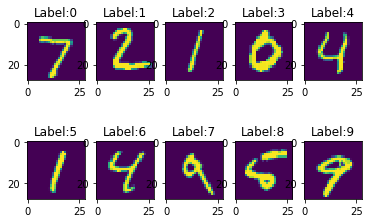

In [22]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("Label:" + str(i))
    plt.imshow(x_test[i].reshape(28,28), cmap= None) #cmap= None はカラーマップの指定をしない

In [23]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [21]:
model.predict(x_test[0:10])
#　表示された値は（[7, 2, 1, 0, 4, 1, 4, 9, 5, 9）それぞれの値である確率

array([[5.4687630e-12, 1.1857839e-12, 1.1239144e-11, 6.6221126e-09,
        3.9611707e-18, 2.0791605e-11, 1.1695627e-18, 1.0000000e+00,
        1.4609188e-13, 7.8233802e-09],
       [1.8821752e-13, 1.9812082e-06, 9.9999797e-01, 1.9643782e-09,
        5.6709140e-21, 4.3375859e-14, 2.2402495e-11, 4.0617271e-17,
        1.6777581e-10, 2.9328474e-18],
       [1.4746196e-12, 9.9999940e-01, 2.5203530e-09, 1.2538348e-12,
        6.6997366e-08, 3.1717684e-10, 1.2256843e-09, 3.5574026e-08,
        4.6748625e-07, 4.8141378e-12],
       [1.0000000e+00, 5.7885027e-17, 7.2774915e-09, 4.5573156e-10,
        4.6838516e-15, 1.1995636e-10, 1.1541973e-09, 3.5131693e-09,
        1.0750347e-12, 4.6130526e-09],
       [2.9110450e-11, 9.1881145e-15, 4.7049851e-14, 2.3221586e-18,
        1.0000000e+00, 1.9590864e-14, 3.4130504e-10, 2.8778850e-09,
        7.3982617e-12, 3.8945824e-08],
       [6.2625716e-15, 1.0000000e+00, 3.4341892e-13, 8.5340697e-14,
        2.7932618e-08, 5.5776006e-13, 2.2082570e-12, 4.49